In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
import warnings


warnings.filterwarnings('ignore')

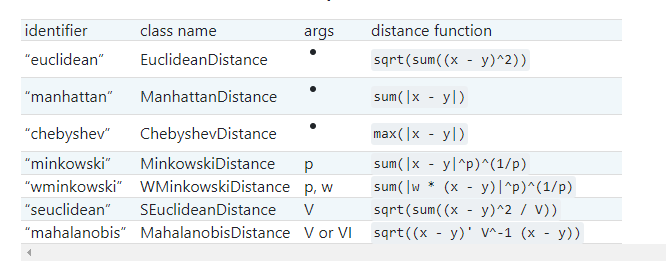

In [2]:
# mahalanobis bi dene güzel şeyler duydum hakkında

In [3]:
data = pd.read_pickle("veriler.pkl")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [4]:
categorical_columns = data.select_dtypes(exclude = 'object').columns.to_list()
#print(categorical_columns)

# categorical olmayan columnların hepsini float32 dtype yapalım

data[categorical_columns] = data[categorical_columns].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ulke      22 non-null     object 
 1   boy       22 non-null     float32
 2   kilo      22 non-null     float32
 3   yas       22 non-null     float32
 4   cinsiyet  22 non-null     object 
dtypes: float32(3), object(2)
memory usage: 744.0+ bytes


In [5]:
x = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)



### Modeli normalize edip devam edelim

In [6]:
""""
df_continuous = data[columns_to_normalize]
min_max_columns_names = list(df_continuous.columns)

    
data = pd.concat([df_continuous,data[categorical]], axis= 1)

data = data.reindex(data.columns, axis = 1)
"""

categorical = categorical_columns

columns_to_normalize = [col for col in data.columns if col not in categorical]
columns_to_normalize = ['boy','kilo','yas']
df = data[columns_to_normalize]
data[columns_to_normalize] = MinMaxScaler().fit_transform(df)

In [7]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,0.073529,0.000000,0.021739,e
1,tr,0.000000,0.080000,0.043478,e
2,tr,0.147059,0.053333,0.021739,k
3,tr,0.117647,0.000000,0.000000,k
4,tr,0.058824,0.106667,0.065217,e
5,tr,0.808823,0.800000,0.456522,e
6,tr,0.955882,0.666667,0.347826,e
7,tr,0.735294,0.800000,0.565217,e
8,tr,0.764706,0.400000,0.282609,k
9,us,0.882353,1.000000,0.521739,e


### ilk önce default knn bir tane de optimize edilmiş metrikleri olan bir knn tanımlayalım

In [8]:
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
y_pred = knn.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.50      1.00      0.67         1
           k       1.00      0.86      0.92         7

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



In [10]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8750


In [11]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8750


<Axes: >

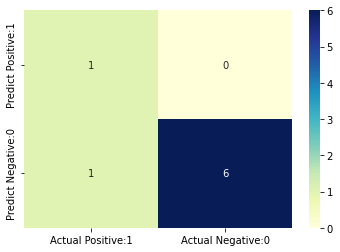

In [12]:
plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Applying 5-Fold Cross Validation


In [13]:
scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.66666667 1.         0.66666667 0.66666667 0.        ]


### future prediction yapalım

In [14]:
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(knn.predict(input_data))

['e']


In [15]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,0.073529,0.000000,0.021739,e
1,tr,0.000000,0.080000,0.043478,e
2,tr,0.147059,0.053333,0.021739,k
3,tr,0.117647,0.000000,0.000000,k
4,tr,0.058824,0.106667,0.065217,e
5,tr,0.808823,0.800000,0.456522,e
6,tr,0.955882,0.666667,0.347826,e
7,tr,0.735294,0.800000,0.565217,e
8,tr,0.764706,0.400000,0.282609,k
9,us,0.882353,1.000000,0.521739,e


In [16]:
encoded_cols = pd.get_dummies(data['cinsiyet'], dtype=np.float32)
data = pd.concat([data, encoded_cols], axis=1)
data.drop('cinsiyet', axis=1, inplace=True)

In [17]:
data

,ulke,boy,kilo,yas,e,k
0,tr,0.073529,0.000000,0.021739,1.0,0.0
1,tr,0.000000,0.080000,0.043478,1.0,0.0
2,tr,0.147059,0.053333,0.021739,0.0,1.0
3,tr,0.117647,0.000000,0.000000,0.0,1.0
4,tr,0.058824,0.106667,0.065217,1.0,0.0
5,tr,0.808823,0.800000,0.456522,1.0,0.0
6,tr,0.955882,0.666667,0.347826,1.0,0.0
7,tr,0.735294,0.800000,0.565217,1.0,0.0
8,tr,0.764706,0.400000,0.282609,0.0,1.0
9,us,0.882353,1.000000,0.521739,1.0,0.0


### ROC - AUC çizelim

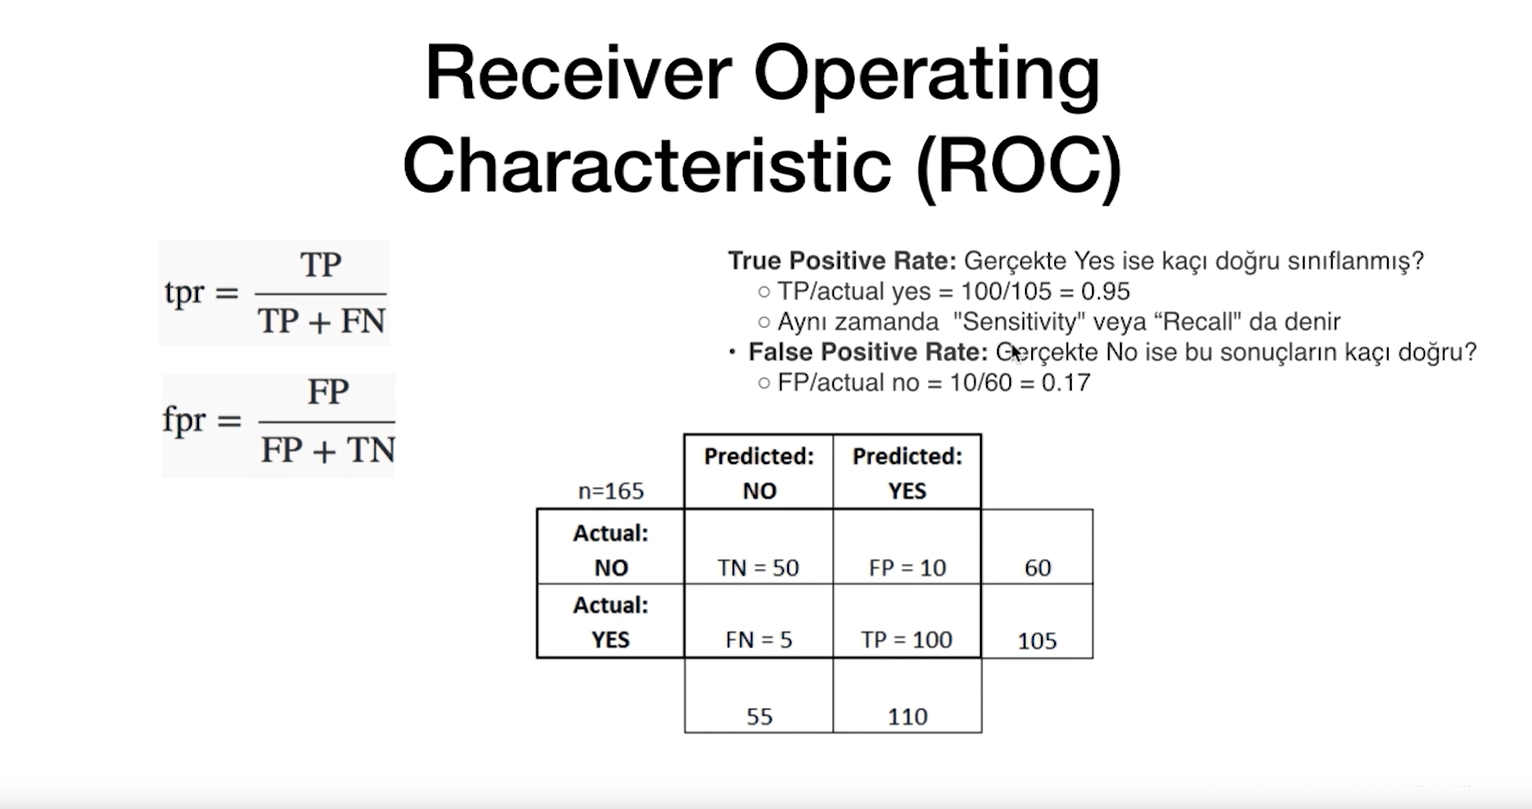


AUC Score: 0.9285714285714286


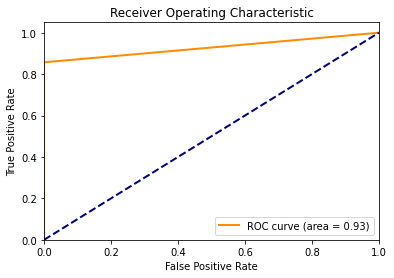

In [18]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = knn.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Bir model daha yapalım, bu sefer knn metrikleri üzerinde daha optimize edici biçimde manipülasyon yapalım

In [19]:
data = pd.read_pickle("veriler.pkl")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [20]:
categorical_columns = data.select_dtypes(exclude = 'object').columns.to_list()
#print(categorical_columns)

# categorical olmayan columnların hepsini float32 dtype yapalım

data[categorical_columns] = data[categorical_columns].astype('float32')
#data.info()

x = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

x = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [21]:
# normalizasyon işlemleri 
categorical = categorical_columns

columns_to_normalize = [col for col in data.columns if col not in categorical]
columns_to_normalize = ['boy','kilo','yas']
df = data[columns_to_normalize]
data[columns_to_normalize] = MinMaxScaler().fit_transform(df)

### bu sefer farklı bir metric ile knn hesabı yapalım

In [26]:
# Kovaryans matrisini hesapla
covariance_estimator = EmpiricalCovariance()
covariance_estimator.fit(X_train)

knn = KNeighborsClassifier(n_neighbors=3, metric='mahalanobis', metric_params={'VI': covariance_estimator.covariance_})
knn.fit(X_train, y_train)
print(knn)

KNeighborsClassifier(metric='mahalanobis',
                     metric_params={'VI': array([[543.25      , 532.96428571, 173.14285714],
       [532.96428571, 615.37244898, 190.85714286],
       [173.14285714, 190.85714286, 126.42857143]])},
                     n_neighbors=3)


In [27]:
y_pred = knn.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00         1
           k       1.00      1.00      1.00         7

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [30]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [31]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8571
Test set score: 1.0000


<Axes: >

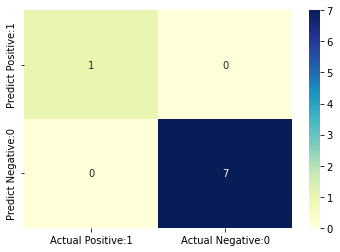

In [32]:
plt.figure(figsize=(6,4))

conf_matrix_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [33]:
#### Applying 5-Fold Cross Validation
scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.66666667 0.66666667 0.66666667 0.66666667 0.5       ]


In [34]:
### future prediction yapalım
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(knn.predict(input_data))

['e']


In [36]:
encoded_cols = pd.get_dummies(data['cinsiyet'], dtype=np.float32)
data = pd.concat([data, encoded_cols], axis=1)
data.drop('cinsiyet', axis=1, inplace=True)

In [37]:
data

,ulke,boy,kilo,yas,e,k
0,tr,0.073529,0.000000,0.021739,1.0,0.0
1,tr,0.000000,0.080000,0.043478,1.0,0.0
2,tr,0.147059,0.053333,0.021739,0.0,1.0
3,tr,0.117647,0.000000,0.000000,0.0,1.0
4,tr,0.058824,0.106667,0.065217,1.0,0.0
5,tr,0.808823,0.800000,0.456522,1.0,0.0
6,tr,0.955882,0.666667,0.347826,1.0,0.0
7,tr,0.735294,0.800000,0.565217,1.0,0.0
8,tr,0.764706,0.400000,0.282609,0.0,1.0
9,us,0.882353,1.000000,0.521739,1.0,0.0


### ROC - AUC çizelim

AUC Score: 1.0


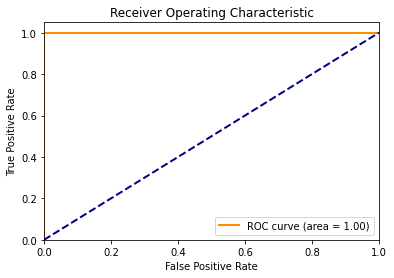

In [38]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = knn.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()